# 2021-12_PKU_Growth

Synlogic measured OD600 of the two for PKU production rate calculations

In [1]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D
from scipy.stats import linregress

## Data Import

In [3]:
file = '/Users/atriassi/Dropbox (Personal)/Education/Grad School/*Papers/Data_fromSynlogic/12-15-2022  Triassi-Voigt-Synlogic Paper - Data for Figure 3 - Toxicity - Growth Defect.xlsx'
sheets = ['OD600 vs IPTG Conc-tidy']

xl = pd.read_excel(file, sheet_name=sheets, header=0)


In [4]:
xl['OD600 vs IPTG Conc-tidy']

,strain_num,inducer,inducer_conc,replicate,Post-Freeze raw od600,Post-Freeze od600 x dilution factor (x100),Induction OD600,Harvest OD600
0,AJT462,iptg,0,1,0.302,30.2,1.049,7.99
1,AJT462,iptg,5,1,0.311,31.1,1.150,6.87
2,AJT462,iptg,15,1,0.271,27.1,1.093,6.88
3,AJT462,iptg,25,1,0.302,30.2,1.142,6.72
4,AJT462,iptg,40,1,0.321,32.1,1.050,6.66
5,AJT462,iptg,70,1,0.285,28.5,1.013,6.41
6,AJT462,iptg,200,1,0.284,28.4,1.008,6.30
7,AJT462,iptg,1000,1,0.283,28.3,0.981,6.05
8,AJT463,iptg,0,1,0.283,28.3,1.119,5.94
9,AJT463,iptg,5,1,0.292,29.2,1.131,6.27


In [5]:
data= xl['OD600 vs IPTG Conc-tidy']


strains = sorted(data['strain_num'].unique())
inducers = sorted(data['inducer'].unique())
iptg_conc = sorted(data['inducer_conc'].unique())
replicate = sorted(data['replicate'].unique())
iptg_plot_conc = [1] + iptg_conc[1:]

print(strains, inducers, iptg_conc, replicate, iptg_plot_conc)


['AJT462', 'AJT463'] ['iptg'] [0, 5, 15, 25, 40, 70, 200, 1000] [1, 2, 3] [1, 5, 15, 25, 40, 70, 200, 1000]


In [6]:
grouped_df = data.groupby(['strain_num','inducer','inducer_conc'], as_index=False).agg([np.mean, np.std])


grouped_df = grouped_df['Harvest OD600']
grouped_df = grouped_df.reset_index()

grouped_df

,strain_num,inducer,inducer_conc,mean,std
0,AJT462,iptg,0,7.773333,0.220076
1,AJT462,iptg,5,6.866667,0.025166
2,AJT462,iptg,15,6.800000,0.075498
3,AJT462,iptg,25,6.700000,0.091652
4,AJT462,iptg,40,6.643333,0.020817
5,AJT462,iptg,70,6.450000,0.060828
6,AJT462,iptg,200,6.286667,0.011547
7,AJT462,iptg,1000,6.010000,0.087178
8,AJT463,iptg,0,6.016667,0.068069
9,AJT463,iptg,5,6.276667,0.030551


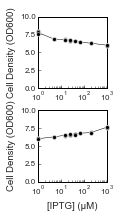

In [9]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

## IPTG x TCA production rate transfer function
rows = 2
cols = 1

fig_pku, ax_pku = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

pku = dict()

for s in strains:
    
    FP = ax_pku[strains.index(s)]
    
    for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
            
#     print(s)
    
    for r in replicate:
        plot_data = data[(data['strain_num'] == s) & (data['replicate'] == r)]
#         display(plot_data)
        
        sns.scatterplot(x = iptg_plot_conc, y = plot_data['Harvest OD600'],
                       color='black', s=15, marker='o', linewidth=0.5,
                        ax=FP, legend=False, zorder=11, clip_on=False)
    
    plot_data = grouped_df[grouped_df['strain_num'] == s]
#     display(plot_data)
    
    sns.lineplot(x= iptg_plot_conc , y = plot_data['mean'], color='black',
                 ax = FP, legend = False, lw=0.5, zorder=1)
    
    FP.set_xscale('log')
    FP.set_ylim(0,10)
    FP.set_xlim(1,1000)
#     FP.set_title(s)
    FP.set_ylabel('Cell Density (OD600)')
    if s == 'AJT463':
        FP.set_xlabel('[IPTG] (\u03BCM)')
        
#     FP.yaxis.set_major_locator(MultipleLocator(0.1))
#     FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#     FP.yaxis.set_minor_locator(MultipleLocator(0.05))
    
    ## set x ticks
    x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 4)
    FP.xaxis.set_major_locator(x_major)
    x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
    FP.xaxis.set_minor_locator(x_minor)
    FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
    
    
    FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')
    FP.grid(False)

In [10]:
# fig_pku.savefig('FigS13_AJT462_463_toxicity_AllPoints.pdf', bbox_inches = "tight", transparent = True)

In [4]:
strains = ['AJT462', 'AJT463', 'AJT437'] 
media = ['M9'] 
iptg_conc = [0, 5, 15, 25, 40, 70, 200, 1000] 
iptg_plot_conc = [0.0001, 5, 15, 25, 40, 70, 200, 1000] 
time = [0, 30, 60, 90, 120]
reps = ['r1','r2','r3']

In [5]:
inducers = ['iptg']

inducer_info = {'iptg': {'conc': iptg_conc}}#,
#                'ohc14': {'conc': ohc14}}

# promoters = ['P$_\mathrm{Tac}$','P$_\mathrm{Cin}$', 'P$_\mathrm{PhlF}$',
#              'P$_\mathrm{LitR}$','P$_\mathrm{PsrA}$']

fig_pos = {'AJT462': {'fig_row': 0,'fig_col':0},
           'AJT463': {'fig_row': 0,'fig_col':1},
           'AJT437': {'fig_row': 0,'fig_col':2},
           'AJT437-+': {'fig_row': 0,'fig_col':3}}

strain_info = {'AJT462': {'color': '#FAAF3B',
                         'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'},
               'AJT463': {'color': '#7BC129',
                         'promoter': 'P$_\mathrm{PhlF}$', #$_\mathrm{}$ allows for subscript without italics
                         'inducer':'iptg',
                          'design':'D1'},
                          
               'AJT437': {'color': '#FAAF3B',
                                   'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                                    'inducer':'iptg',
                                    'design':'PKU2.0'},
               'AJT437-+': {'color': '#FAAF3B',
                                   'promoter': 'P$_\mathrm{Tac}$', #$_\mathrm{}$ allows for subscript without italics
                                    'inducer':'iptg',
                                    'design':'PKU2.0'}}

rep_info = {'r1': {'marker': 'o',
                   'facecolor': 'white',
                   'edgecolor': 'black',
                   'linecolor': 'black'},
            'r2': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'grey',
                   'linecolor': 'grey'},
            'r3': {'marker': 'o',
                   'facecolor': 'white',
                    'edgecolor': 'darkgrey',
                    'linecolor': 'darkgrey'}}


In [6]:
TCA_data_TF_r1['AJT462']['M9']['iptg'][1000].loc[:,'TCA (mM)']

0      0.0166805
30     0.0697335
60      0.162817
90      0.248185
120     0.341268
Name: TCA (mM), dtype: object

In [7]:
TCA_data = dict()
TCA_rate = dict()

for s in strains:
    TCA_data[s] = dict()
    TCA_rate[s] = dict()
    for c in iptg_conc:
        TCA_data[s][c] = dict()
        TCA_rate[s][c] = dict()
        for r in reps:
            if r == 'r1':
                TCA_data[s][c][r] = TCA_data_TF_r1[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r1[s]['M9']['iptg'][c]
            if r == 'r2':
                TCA_data[s][c][r] = TCA_data_TF_r2[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r2[s]['M9']['iptg'][c]
            if r == 'r3':
                TCA_data[s][c][r] = TCA_data_TF_r3[s]['M9']['iptg'][c].loc[:,'TCA (mM)']
                TCA_rate[s][c][r] = TCA_rates_TF_r3[s]['M9']['iptg'][c]


In [8]:
# concatenate data into dataframes with all replicates in it for easy calculation of means and stdev

TCA_data_r123 = dict()
TCA_rate_r123 = dict()

TCA_data_means = dict()
TCA_rate_means = dict()

for s in strains:
    TCA_data_r123[s] = dict()
    TCA_rate_r123[s] = dict()
    
    TCA_data_means[s] = dict()
    TCA_rate_means[s] = dict()
    
    for c in iptg_conc:
        
        # needed to reset index because not all data had same and concatenation got funky
        # ignore_index does not work in pd.concat because that just ignores the index as a concatenation filter, 
        # doesn't actually allow concatenation of mismatching indeces
        TCA_data_r123[s][c] = pd.concat([TCA_data[s][c]['r1'].reset_index(drop=True),
                                         TCA_data[s][c]['r2'].reset_index(drop=True), 
                                         TCA_data[s][c]['r3'].reset_index(drop=True)], 
                                        keys = reps, axis = 1)
        TCA_rate_r123[s][c] = pd.concat([TCA_rate[s][c]['r1'].reset_index(drop=True),
                                         TCA_rate[s][c]['r2'].reset_index(drop=True),
                                         TCA_rate[s][c]['r3'].reset_index(drop=True)],
                                        keys = reps, axis = 1)
        
        TCA_data_means[s][c] = dict()
        TCA_rate_means[s][c] = dict()
        
        TCA_data_means[s][c]['means'] = TCA_data_r123[s][c].mean(axis=1)
        TCA_data_means[s][c]['stdevs'] = TCA_data_r123[s][c].std(axis=1)
        
        TCA_rate_means[s][c]['means'] = TCA_rate_r123[s][c].mean(axis=1)
        TCA_rate_means[s][c]['stdevs'] = TCA_rate_r123[s][c].std(axis=1)

In [9]:
TCA_data_means['AJT462'][200]['means']

0    0.014591
1    0.059284
2    0.137738
3    0.225356
4    0.309437
dtype: float64

In [10]:
TCA_rate_means['AJT462'][1000]['means']

0    0.151285
dtype: float64

In [11]:
TCA_rate_r123['AJT462'][1000]

,r1,r2,r3
0,0.145545,0.153655,0.154656


In [12]:
TCA_rate['AJT462'][1000]['r3']

15    0.154656
Name: od600, dtype: float64

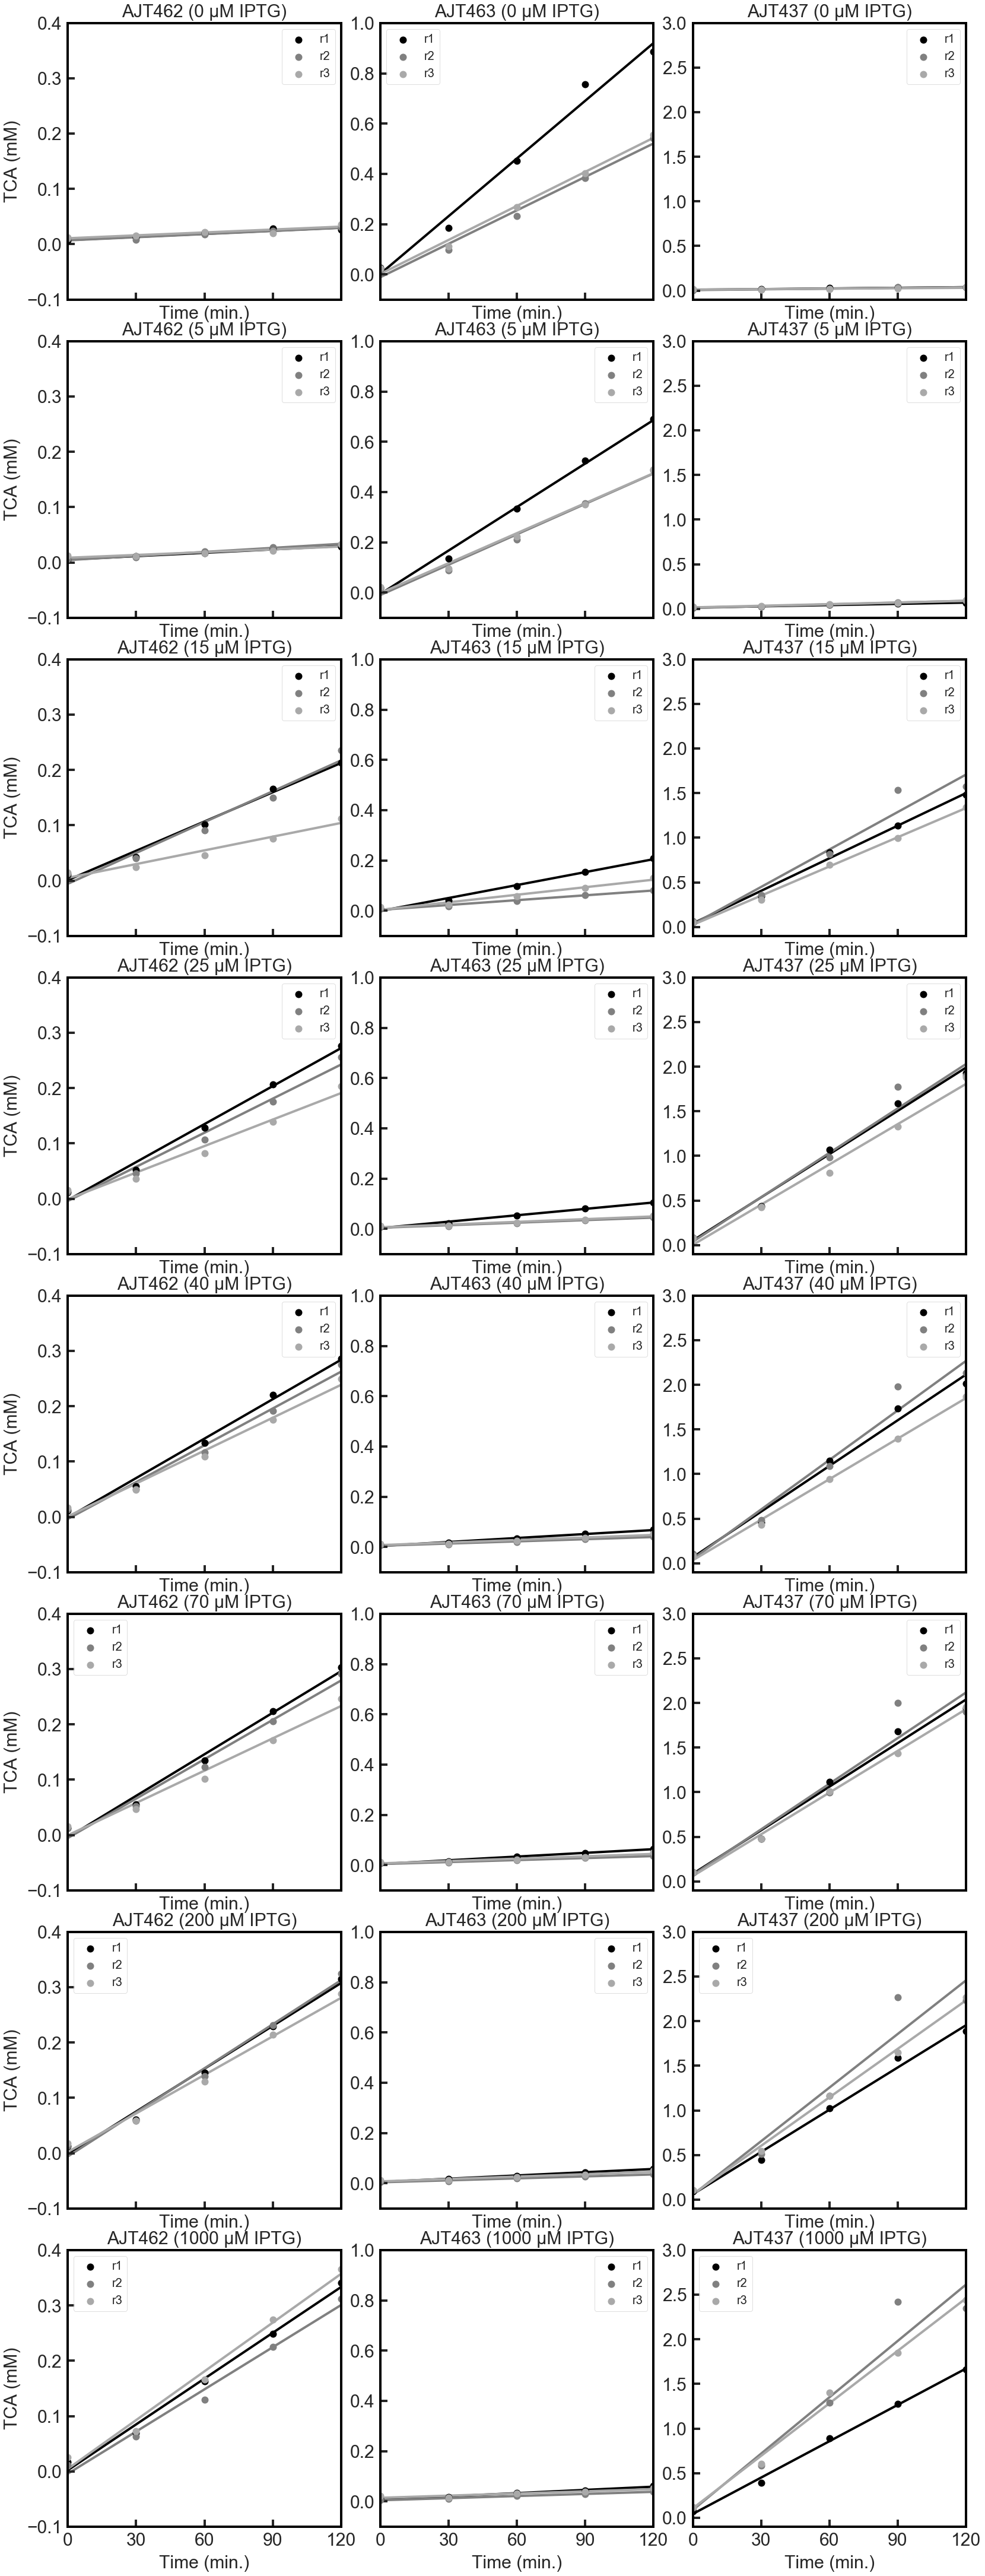

In [13]:
rows = 8
cols = 3

fig, ax = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:
        results[s][c] = dict()
        for r in reps:

            # set figure position within subplot
            FP = ax[iptg_conc.index(c)][strains.index(s)]

            # make plot borders black and specified thickness
            for spine in FP.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(4)

            # calculate slope of best-fit line through the points
            results[s][c][r] = linregress(time, TCA_data[s][c][r].astype(float))

            # plot data
            FP.scatter(time, TCA_data[s][c][r], color = rep_info[r]['edgecolor'], zorder = 1,
               edgecolors = rep_info[r]['edgecolor'], linewidths = 2, marker = rep_info[r]['marker'], s = 100,
                      label = '{}'.format(r))

            # plot best-fit line
            y_fit = results[s][c][r].intercept + results[s][c][r].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = rep_info[r]['linecolor'], zorder=0,
                    linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


            FP.grid(False)
            FP.set_title('{} ({} \u03BCM IPTG)'.format(s,c), size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
            FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

            if s == 'AJT437':
                FP.set_ylim(-0.1,3)
            if s == 'AJT462':
                FP.set_ylim(-0.1,0.4)
            if s == 'AJT463':
                FP.set_ylim(-0.1,1)
                
            FP.set_xlim(0,120)

            if strains.index(s) == 0:
                FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

            FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
            FP.set_xticks(time)
    #         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

            FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [14]:
# fig.savefig('AJT462_463_TCAconversion_Time_x_TCA_EachReplicate.pdf', bbox_inches = "tight", transparent = True)

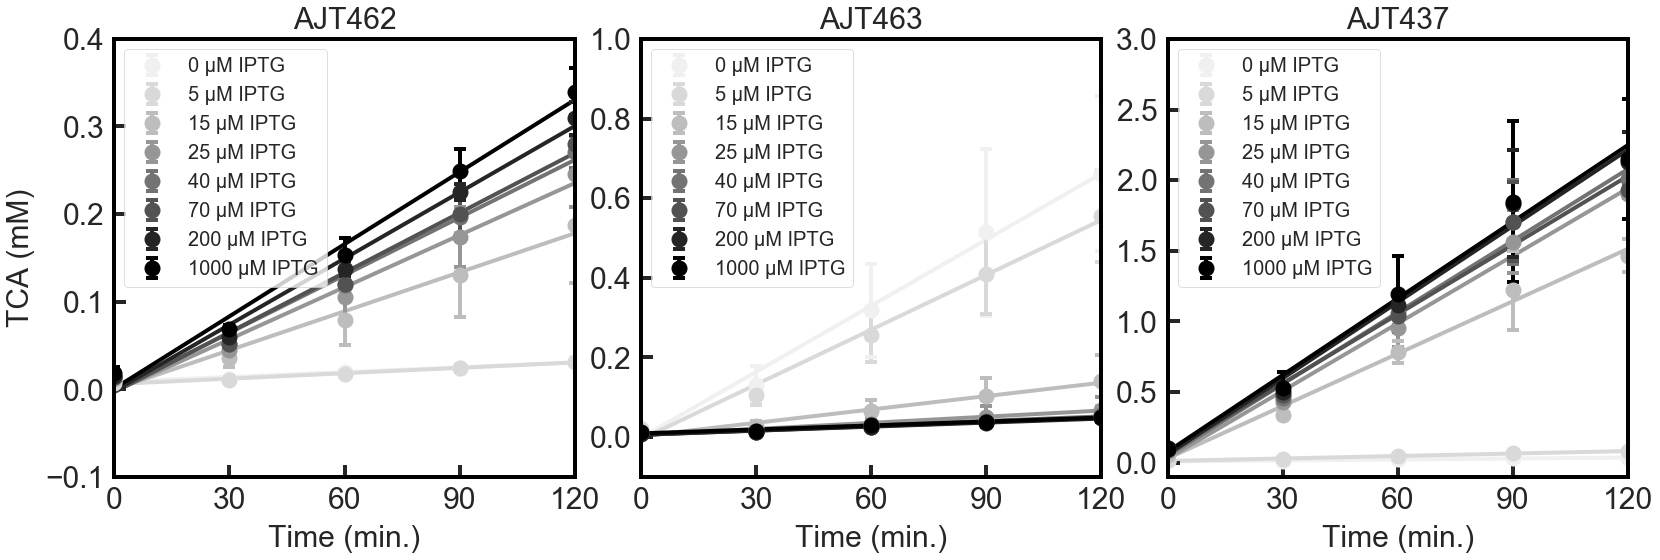

In [14]:
grays = ['#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']

rows = 1
cols = 3

fig_means, ax_means = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows),sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 6, w_pad = 4) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax_means[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(4)

        # calculate slope of best-fit line through the points
        results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

        # plot data
        FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
                    mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], 
                    mew = 4, marker = 'o', ms = 12, linewidth = 0,
                    ecolor = grays[iptg_conc.index(c)], elinewidth = 4, capsize = 6, capthick = 4,
                    label = '{} \u03BCM IPTG'.format(c))

        # plot best-fit line
        y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
        FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                linewidth = 4)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
        FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 30, labelpad = 10)

        if s == 'AJT437':
                FP.set_ylim(-0.1,3)
        if s == 'AJT462':
            FP.set_ylim(-0.1,0.4)
        if s == 'AJT463':
            FP.set_ylim(-0.1,1)
                
        FP.set_xlim(0,120)

        if strains.index(s) == 0:
            FP.set_ylabel('TCA (mM)', size = 30, labelpad = 10)

        FP.tick_params(labelsize = 30, length = 12, width = 4, direction = 'in', pad = 10)
        FP.set_xticks(time)
#         FP.tick_params(which='minor', length = 6, width = 4, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [16]:
# fig_means.savefig('AJT462_463_TCAconversion_Time_x_TCA_ErrorBars.pdf', bbox_inches = "tight", transparent = True)

In [15]:
## Function to adjust figure size to make actual axes certain size
# from https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units

def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

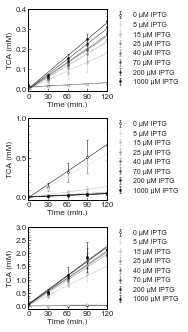

In [15]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

rows = 3
cols = 1

fig_means2, ax_means2 = plt.subplots(rows,cols, figsize=(2.5*cols,1.5*rows), sharey = 'row', constrained_layout = True)
# plt.tight_layout(h_pad = 0) #tidies up spacing between plots

results = dict()

for s in strains:
    results[s] = dict()
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax_means2[strains.index(s)]
#         FP.set_aspect('equal', adjustable = 'box') 

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        # calculate slope of best-fit line through the points
        results[s][c] = linregress(time, TCA_data_means[s][c]['means'].astype(float))

        if c == 0:
            FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
                    mfc = 'white', zorder = 1, mec = 'black', mew = 0.5,
                    marker = 'o', ms = 2, linewidth = 0,
                    ecolor = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5,
                    label = '{} \u03BCM IPTG'.format(c))
            
            y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = 'black', zorder=0,
                linewidth = 0.5)
            
        
        # plot data
        if c != 0:
            FP.errorbar(time, TCA_data_means[s][c]['means'], yerr = TCA_data_means[s][c]['stdevs'],
                    mfc = grays[iptg_conc.index(c)], zorder = 1, mec = grays[iptg_conc.index(c)], mew = 0.5,
                    marker = 'o', ms = 2, linewidth = 0,
                    ecolor = grays[iptg_conc.index(c)], elinewidth = 0.5, capsize = 1, capthick = 0.5,
                    label = '{} \u03BCM IPTG'.format(c))

            # plot best-fit line
            y_fit = results[s][c].intercept + results[s][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
            FP.plot(time, y_fit, color = grays[iptg_conc.index(c)], zorder=0,
                    linewidth = 0.5)

#         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
#            marker = 'o', ms = 10, linewidth = 4,
#                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))


        FP.grid(False)
#         FP.set_title(s, size = 30, pad = 10)
#                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Time (min.)', size = 8, labelpad = 2)

        if s == 'AJT437':
            FP.set_ylim(-0.1,3)
            FP.yaxis.set_major_locator(MultipleLocator(0.5))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            FP.yaxis.set_minor_locator(MultipleLocator(0.1))
        if s == 'AJT462':
            FP.set_ylim(-0.013,0.4)
            FP.yaxis.set_major_locator(MultipleLocator(0.1))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        if s == 'AJT463':
            FP.set_ylim(-0.033,1)
            FP.yaxis.set_major_locator(MultipleLocator(0.5))
            FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            FP.yaxis.set_minor_locator(MultipleLocator(0.1))
            
        FP.set_xlim(0,120)

#         if strains.index(s) == 0:
        FP.set_ylabel('TCA (mM)', size = 8, labelpad = 2)
    
#         FP.yaxis.set_major_locator(MultipleLocator(0.5))
#         FP.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#         FP.yaxis.set_minor_locator(MultipleLocator(0.1))

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

        FP.legend(markerscale = 1, fontsize = 7, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., frameon = False)
        
#         set_size(2,2)
# plt.show()


In [44]:
# fig_means2.savefig('AJT462_463_437_TCAconversion_Time_x_TCA_ErrorBars_black.pdf', bbox_inches = "tight", transparent = True)

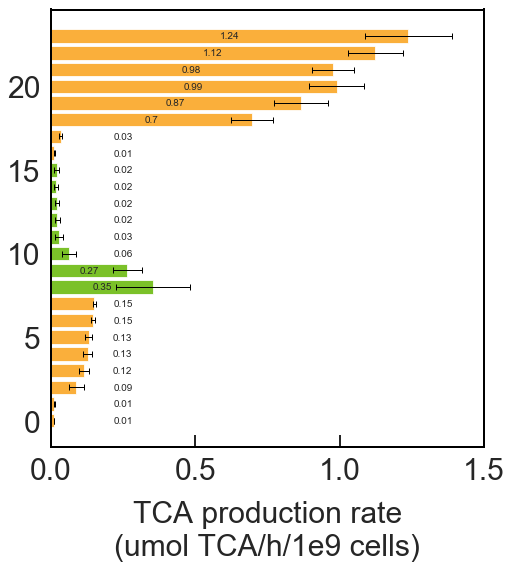

In [17]:
rows = 1
cols = 1

fig2,ax2 = plt.subplots(rows,cols, figsize=(7.5*cols, 7.5*rows), sharey = 'row',sharex = 'col')
plt.tight_layout(pad = 4, h_pad = 4, w_pad = 4) #tidies up spacing between plots

# labels = []

for s in strains:
    for c in iptg_conc:
        # set figure position within subplot
        FP = ax2

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(2)

        y_pos = strains.index(s)*8 + iptg_conc.index(c)
        height = TCA_rate_means[s][c]['means']
#                 labels.append('{} ({} mM IPTG)'.format(s,i))
        colors = strain_info[s]['color']

        FP.barh(y_pos, height, color = colors, xerr = TCA_rate_means[s][c]['stdevs'],
                   error_kw = {'ecolor':'black', 'elinewidth': 1, 'capsize': 3, 'capthick': 1})
    
        FP.grid(False)

#                 FP.set_title('{} culture volume'.format(m), size = 30)
        FP.set_xlabel('TCA production rate\n(umol TCA/h/1e9 cells)', size = 30, labelpad = 15)
        # FP.set_ylabel('Strain', size = 30)

        FP.set_xlim(0,1.5)

        FP.tick_params(labelsize = 30, length = 12, width = 2, direction = 'in', pad = 10)
        FP.tick_params(axis='y',labelsize = 30, length = 0, width = 0, direction = 'in', pad = 10)

#                     FP.set_yticks(range(len(strains)*2-1))
#                     FP.set_yticklabels(['AJT462 -IPTG','AJT462 +IPTG','AJT463 -IPTG',
#                                         'AJT463 +IPTG','AJT467 -IPTG','AJT467 +IPTG',
#                                         'AJT470 -IPTG','AJT470 +IPTG'])

        if height.iloc[0]/2 > 0.1:
            FP.text(height/2, y_pos, '{}'.format(round(height.iloc[0],2)), size = 10, verticalalignment = 'center',horizontalalignment = 'center')
        else:
            FP.text(0.25, y_pos, '{}'.format(round(height.iloc[0],2)), size = 10, verticalalignment = 'center',horizontalalignment = 'center')


In [21]:
# fig2.savefig('AJT462_463_TCAproduction_rate_barplot_EachReplicate.pdf', bbox_inches = "tight", transparent = True)


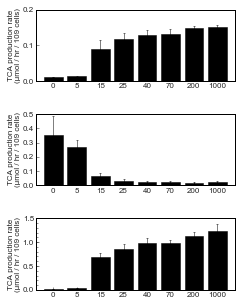

In [18]:
rows = 3
cols = 1

fig2_means2,ax2_means2 = plt.subplots(rows,cols, figsize=(3.5*cols,1.5*rows), sharey = 'row')
plt.tight_layout() #tidies up spacing between plots

# labels = []

for s in strains:
    for c in iptg_conc:
        # set figure position within subplot
        FP = ax2_means2[strains.index(s)]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        y_pos = iptg_conc.index(c)
        height = TCA_rate_means[s][c]['means']
#                 labels.append('{} ({} mM IPTG)'.format(s,i))
        colors = 'black'

        if c == 0:
            FP.bar(y_pos, height, yerr = TCA_rate_means[s][c]['stdevs'], 
                    color = colors, edgecolor = colors, linewidth = 0.5,
                   error_kw = {'ecolor': 'black', 'elinewidth': 0.5, 'capsize': 1, 'capthick' :0.5})
        else:
            FP.bar(y_pos, height, yerr = TCA_rate_means[s][c]['stdevs'], 
                    color = colors, edgecolor = colors, linewidth = 0.5,
                   error_kw = {'ecolor': 'black', 'elinewidth': 0.5, 'capsize': 1, 'capthick' :0.5})

        FP.grid(False)

#                 FP.set_title('{} culture volume'.format(m), size = 30)
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 109 cells)', size = 8, labelpad = 2)
        # FP.set_ylabel('Strain', size = 30)

        FP.set_xlim(-0.75,7.75)
        
        if s == 'AJT462':
            FP.set_ylim(0, 0.2)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.1)
            FP.yaxis.set_major_locator(y_major)
        if s == 'AJT463':
            FP.set_ylim(0,0.5)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.1)
            FP.yaxis.set_major_locator(y_major)
        if s == 'AJT437':
            FP.set_ylim(0,1.5)
            y_major = matplotlib.ticker.MultipleLocator(base = 0.5)
            FP.yaxis.set_major_locator(y_major)
            y_minor = matplotlib.ticker.MultipleLocator(base = 0.1)
            FP.yaxis.set_minor_locator(y_minor)

#         y_major = matplotlib.ticker.MultipleLocator(base = 0.5)
#         FP.yaxis.set_major_locator(y_major)
#         y_minor = matplotlib.ticker.MultipleLocator(base = 0.1)
#         FP.yaxis.set_minor_locator(y_minor)
#         FP.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

        FP.set_xticks(np.arange(8))
        FP.set_xticklabels(iptg_conc)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
        FP.tick_params(which = 'minor', length = 2, width = 0.5, direction = 'in', pad = 2)
#         FP.tick_params(axis='y',labelsize = 7, length = 2, width = 0, direction = 'in', pad = 2)

#         FP.set_yticks(range(len(strains)))
#         FP.set_yticklabels(['P$_\mathrm{Tac}$ -IPTG','P$_\mathrm{Tac}$ +IPTG',
#                             'P$_\mathrm{PhlF}$ -IPTG','P$_\mathrm{PhlF}$ +IPTG'])

#         FP.text(height+0.06, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'left')
            
#             if height.iloc[0]/2 > 0.1:
#                 FP.text(height/2, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'center')
#             else:
#                 FP.text(0.1, y_pos, '{}'.format(round(height.iloc[0],2)), size = 30, verticalalignment = 'center',horizontalalignment = 'center')
                        

In [23]:
# fig2_means2.savefig('AJT462_463_TCAproduction_rate_barplot_ErrorBars_black.pdf', bbox_inches = "tight", transparent = True)


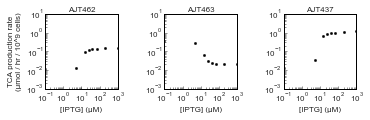

In [19]:
## IPTG x TCA production rate transfer function
rows = 1
cols = 3

fig3, ax3 = plt.subplots(rows,cols, figsize=(1.75*cols, 1.9*rows),sharex = 'col')
plt.tight_layout(pad = 2, h_pad = 2, w_pad = 2) #tidies up spacing between plots

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

    #                 ## transfer functions
    #                 tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
    #                                         [means['au'][s].tolist()], # y data
    #                                         [s]) # name

        # plot data
        if c == 0:
            FP.scatter(0.1, TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
               edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

        else:
            FP.scatter(c, TCA_rate_means[s][c]['means'], color = 'black',
               linewidths = 0.5, marker = 'o', s = 5)


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
        FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

        FP.set_ylim(0.001,10)
        FP.set_xlim(0.1, 1000)

        if fig_pos[s]['fig_col'] == 0:
            FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [20]:
% store -r AJT269_means_RNAP_store

AJT269_means_RNAP_store

0.0       0.002135
5.0       0.002959
15.0      0.007939
25.0      0.024757
40.0      0.149971
70.0      0.242604
200.0     0.323266
1000.0    0.371446
dtype: float64

In [21]:
TCA_rate_means_temp = dict()
TCA_rate_stdevs_temp = dict()

TCA_rate_means_all = dict()
TCA_rate_stdevs_all = dict()

for s in strains:
    TCA_rate_means_temp[s] = dict()
    TCA_rate_stdevs_temp[s] = dict()
    for c in iptg_conc:
        TCA_rate_means_temp[s][c] = TCA_rate_means[s][c]['means'].values[0]
        TCA_rate_stdevs_temp[s][c] = TCA_rate_means[s][c]['stdevs'].values[0]
    TCA_rate_means_all[s] = pd.Series(TCA_rate_means_temp[s])
    TCA_rate_stdevs_all[s] = pd.Series(TCA_rate_stdevs_temp[s])


In [22]:
TCA_rate_means_all['AJT462'].tolist()

[0.011021515724686159,
 0.012693199553052878,
 0.08937806417218963,
 0.11634325453575785,
 0.12853860650250143,
 0.13258989312788858,
 0.14746729515651788,
 0.15128528788821086]

In [23]:
from scipy.optimize import curve_fit

### different functions to model the growth curve ########################
def Sensor(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (x**n)/((x**n) + (kd**n))


def NOTgate(x, ymin, ymax, kd, n):
    return ymin +  (ymax - ymin) * (kd**n)/((x**n) + (kd**n))
##########################################################################

TCA_rate_means_min = dict()
TCA_rate_means_max = dict()
results_means = dict()
pcov_means = dict()
fit_params_means = dict()

for s in strains:
    results_means[s] = dict()
    pcov_means[s] = dict()
    fit_params_means[s] = dict()
    
    
    TCA_rate_means_min[s] = TCA_rate_means_all[s].min()
    TCA_rate_means_max[s] = TCA_rate_means_all[s].max()
    
    initial_guesses = [TCA_rate_means_min[s], TCA_rate_means_max[s], 0.5, 2] # guesses that work well in Jai's function
    
    # curve fit the test data
    if s in ['AJT462','AJT437']:
        results_means[s], pcov_means[s] = curve_fit(Sensor, AJT269_means_RNAP_store, TCA_rate_means_all[s], initial_guesses)
        
    elif s == 'AJT463':
        results_means[s], pcov_means[s] = curve_fit(NOTgate, AJT269_means_RNAP_store, TCA_rate_means_all[s], initial_guesses)

    # results is a list containing fitted parameter [ymin, ymax, kd, n] 
    fit_params_means[s] = {'ymin': results_means[s][0],
                        'ymax': results_means[s][1],
                        'kd': results_means[s][2],
                        'n': results_means[s][3], # results[s][r][1] = growth_rate

                        # get standard error
                        'std_err': np.sqrt(np.diag(pcov_means[s])) # array listing standard error of growth_rate, lag_time, and double_time
                       }    

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars


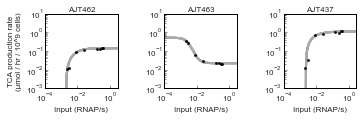

In [24]:
## IPTG x TCA production rate transfer function
rows = 1
cols = 3

fig3_RNAP, ax3_RNAP = plt.subplots(rows,cols, figsize=(1.75*cols, 1.9*rows),sharex = 'col')
plt.tight_layout(pad = 2, h_pad = 2, w_pad = 2) #tidies up spacing between plots

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_RNAP[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

    #                 ## transfer functions
    #                 tfs_means_au[s] = build_transfer_functions([inducer_info['plot_conc']], # x data
    #                                         [means['au'][s].tolist()], # y data
    #                                         [s]) # name

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(AJT269_means_RNAP_store[c], TCA_rate_means[s][c]['means'], color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        if s in ['AJT462','AJT437']:
            xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
            yvals = Sensor(xvals, *results_means[s])
        
        if s == 'AJT463':
            xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
            yvals = NOTgate(xvals, *results_means[s])
            
        FP.plot(xvals, yvals, color = 'darkgrey', zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
        FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        FP.set_xlabel('Input (RNAP/s)', size = 8, labelpad = 2)

        FP.set_ylim(0.001,10)
        FP.set_xlim(0.0001, 3)

        if fig_pos[s]['fig_col'] == 0:
            FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8)

        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])

In [25]:
max(TCA_rate_means_all[s].tolist())

1.238018736781288

In [26]:
from transferfunction_beta import *

## Using modified transferfunction.py script (transferfunction_beta.py)
This should be able to do activator and repressor functions in same cell

/usr/local/lib/python3.6/site-packages/transferfunction_beta.py:92: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/site-packages/transferfunction_beta.py:79: RuntimeWarning: invalid value encountered in double_scalars


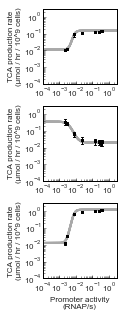

In [29]:
## IPTG x TCA production rate transfer function
rows = 3
cols = 1

fig3_RNAP_tf_beta, ax3_RNAP_tf_beta = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad = 0) #tidies up spacing between plots

tfs_means_RNAP = dict()

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_RNAP_tf_beta[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        ## transfer functions
        if s in ['AJT462','AJT437']:
            tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'activator') # name, kind
        if s == 'AJT463':
            tfs_means_RNAP[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'repressor') # name, kind

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
        ## errorbars
        FP.errorbar(tfs_means_RNAP[s][0].inputs, tfs_means_RNAP[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(3), 1000) # x values for creating smooth line
        
        if s in ['AJT462','AJT437']:
            FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn_act(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
        
        if s == 'AJT463':
            FP.plot(xvals, tfs_means_RNAP[s][0].hill_eqn_rep(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        if s == 'AJT437':
            FP.set_xlabel('Promoter activity\n(RNAP/s)', size = 8, labelpad = 2)

        FP.set_ylim(0.0001, 3)
        FP.set_xlim(0.0001, 3)

#         if fig_pos[s]['fig_col'] == 0:
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [30]:
# fig3_RNAP_tf_beta.savefig('AJT462_463_437_TFs_RNAPxTCArate_ErrorBars.pdf', bbox_inches = "tight", transparent = True)


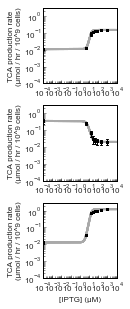

In [46]:
## IPTG x TCA production rate transfer function
rows = 3
cols = 1

fig3_iptg_tf_beta, ax3_iptg_tf_beta = plt.subplots(rows,cols, figsize=(1.69*cols,1.45*rows))
plt.tight_layout(h_pad=0) #tidies up spacing between plots

tfs_means_iptg = dict()

for s in strains:
    for c in iptg_conc:

        # set figure position within subplot
        FP = ax3_iptg_tf_beta[fig_pos[s]['fig_col']]

        # make plot borders black and specified thickness
        for spine in FP.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        ## transfer functions
        if s in ['AJT462','AJT437']:
            tfs_means_iptg[s] = build_transfer_functions([iptg_plot_conc], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'activator') # name, kind
        if s == 'AJT463':
#             tfs_means_iptg[s] = build_transfer_functions([AJT269_means_RNAP_store], # x data
#                                     [TCA_rate_means_all[s].tolist()], # y data
#                                     [s], kind = 'repressor') # name, kind
            tfs_means_iptg[s] = build_transfer_functions([iptg_plot_conc], # x data
                                    [TCA_rate_means_all[s].tolist()], # y data
                                    [s], kind = 'repressor') # name, kind

        # plot data
#         if c == 0:
#             FP.scatter(AJT269_means_RNAP_store[0], TCA_rate_means[s][c]['means'], color = 'white',zorder = 1, # set IPTG to 0.1 instead of 0
#                edgecolors = 'black', linewidths = 0.5, marker = 'o', s = 5)

#         else:
        FP.scatter(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, color = 'black',
           linewidths = 0.5, marker = 'o', s = 5, zorder = 1)
    
        ## errorbars
        FP.errorbar(tfs_means_iptg[s][0].inputs, tfs_means_iptg[s][0].outputs, yerr = TCA_rate_stdevs_all[s],
                                                zorder=2, fmt = 'none', # plots just error bars, no marker or line
                                                c = 'black', elinewidth = 0.5, capsize = 1, capthick = 0.5)#,


    #                         # plot best-fit line
    #                         y_fit = results[s][m][i][c].intercept + results[s][m][i][c].slope*pd.Series(time)# time needed to be a Series instead of a list to do multiplication without doing list comprehension to multiply each value
    #                         FP.plot(time, y_fit, color = strain_info[s]['color'], zorder=0,
    #                                 linewidth = 4)

    #         FP.plot(time, data_TCA[s][m][1].loc[:,'TCA (mM)'], color = strain_info[s]['color'],
    #            marker = 'o', ms = 10, linewidth = 4,
    #                 label = '{} ({}) - {}'.format(strain_info[s]['promoter'],m,s))

        ## fitting line
        xvals = np.logspace(np.log10(0.0001),np.log10(10000), 1000) # x values for creating smooth line
        
        if s in ['AJT462','AJT437']:
            FP.plot(xvals, tfs_means_iptg[s][0].hill_eqn_act(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
        
        if s == 'AJT463':
            FP.plot(xvals, tfs_means_iptg[s][0].hill_eqn_rep(xvals),
                                      color = 'darkgrey',
                                      zorder = 0, linewidth = 2)
    
        FP.set_xscale('log')
        FP.set_yscale('log')

        FP.grid(False)
#         FP.set_title(s, size = 8, pad = 2)
    #                         if fig_pos[strain_info[s]['design']]['fig_col'] == 0:
        if s == 'AJT437':
            FP.set_xlabel('[IPTG] (\u03BCM)', size = 8, labelpad = 2)

        FP.set_ylim(0.0001,3)
        FP.set_xlim(0.0001, 10000)

#         if fig_pos[s]['fig_col'] == 0:
        FP.set_ylabel('TCA production rate\n(\u03BCmol / hr / 10^9 cells)', size = 8, labelpad = 2)

        ## set x ticks
        x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 9)
        FP.xaxis.set_major_locator(x_major)
        x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
        FP.xaxis.set_minor_locator(x_minor)
        FP.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
            
        FP.tick_params(labelsize = 8, length = 3, width = 0.5, direction = 'in', pad = 2)
    #                         FP.set_xticks(time)
        FP.tick_params(which='minor', length = 2, width = 0.5, direction = 'in')

    #                 FP.legend(markerscale = 1, fontsize = 20)

# fig.delaxes(ax[0][2])
#         print(s, tfs_means_RNAP[s][0].ymin, tfs_means_RNAP[s][0].ymax)

In [35]:
# fig3_iptg_tf_beta.savefig('AJT462_463_437_TFs_IPTGxTCArate_ErrorBars.pdf', bbox_inches = "tight", transparent = True)


In [48]:
hill_params = dict()
hill_params_df = dict()

for s in strains:
    hill_params[s] = ({'Strain': s,
                     'Max inducer (uM)': round(max(tfs_means_iptg[s][0].inputs), 2),
                     'ymax (umol / hr / 10^9 cells)' : round(tfs_means_iptg[s][0].ymax,2),
#                      'ymin (RPU * 10^-3)' : round(min(tfs_means_RPU[s][0].outputs)/(1*10**-3),1),
                     'ymin (umol / hr / 10^9 cells)' : round(tfs_means_iptg[s][0].ymin,4),
                     'K (uM)': round(tfs_means_iptg[s][0].kd, 2), 
                     'n': round(tfs_means_iptg[s][0].n, 2),
                     'fold-change': round((max(tfs_means_iptg[s][0].outputs))/(min(tfs_means_iptg[s][0].outputs)),2)})
    hill_params_df[s] = pd.DataFrame.from_dict(hill_params[s], orient = 'index')

hill_params_df_all = pd.concat([hill_params_df['AJT462'], hill_params_df['AJT463'], hill_params_df['AJT437']], axis = 1)
                                

In [49]:
hill_params_df_all

,0,0,0
Strain,AJT462,AJT463,AJT437
Max inducer (uM),1000,1000,1000
ymax (umol / hr / 10^9 cells),0.15,0.35,1.24
ymin (umol / hr / 10^9 cells),0.011,0.0199,0.0129
K (uM),15.05,7.43,15.77
n,3.62,2.74,3.42
fold-change,13.73,17.85,96.18
